In [3]:
# https://machinelearningmastery.com/feature-selection-with-numerical-input-data/#:~:text=The%20two%20most%20commonly%20used,and%20the%20mutual%20information%20statistic.

In [27]:
import pandas as pd
import os
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [28]:
core_path = os.getcwd().replace("notebooks","artifacts")
values_path = os.path.join(core_path, "values.csv")

In [29]:
cols = pd.read_csv(values_path).columns

In [30]:
def load_dataset(file):
    data = pd.read_csv(file, header=None)
    dataset = data.values
    X = dataset[:, :-2]
    y = dataset[:,-1]
    return X, y

In [31]:
X, y = load_dataset(values_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
def select_features(X_train, y_train, X_test, score):
    fs = SelectKBest(score_func=score, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

## ANOVA f-test

In [41]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif)
out_dict = dict()
for i in range(len(fs.scores_)):
    # print('Feature %d: %f' % (i, fs.scores_[i]))
    out_dict[fs.scores_[i]] = cols[i]
for k, v in dict(sorted(out_dict.items(), reverse=True)).items():
    print(f'{v}: {k}')

VV_Plus_VH: 884.2275539820935
VV_Times_VH: 871.7026405670699
B8A: 775.715645523237
VH: 755.2612979426252
B8: 742.2725780407549
VV: 725.4121860745321
MNDWI: 703.9354018656819
VH_Times_VH: 642.5912114898453
B7: 640.3757851589061
NDTI: 636.2557394515495
VV_Times_VV: 620.846649441348
DI: 589.9910097400214
B6: 579.5368618518706
B11: 509.12001661193756
NDVI: 499.3661339175354
B12: 303.3137477335596
B5: 226.6785730627858
B4: 115.36961287538784
NDBI: 112.48641377702468
VH_VV_Ratio: 46.69236719613062
B3: 24.22225541844213
B2: 13.777782043804137
VV_VH_Ratio: 4.705166748797874
EVI: 0.6854178341157883


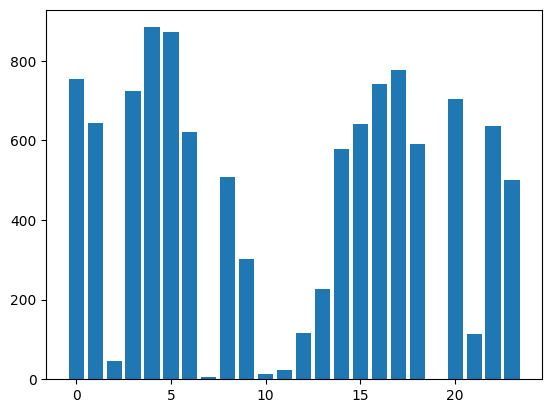

In [34]:
plt.bar(list(range(len(fs.scores_))), fs.scores_)
plt.show()

## Mutual Information

In [42]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif)
out_dict = dict()
for i in range(len(fs.scores_)):
    # print('Feature %d: %f' % (i, fs.scores_[i]))
    out_dict[fs.scores_[i]] = cols[i]
for k, v in dict(sorted(out_dict.items(), reverse=True)).items():
    print(f'{v}: {k}')

DI: 0.47607910688853505
MNDWI: 0.47030915886887237
B12: 0.4505299771208222
B11: 0.44907206010155276
VV_Times_VH: 0.4391165368415997
VH_Times_VH: 0.43325411507812017
B8: 0.4261814950930918
VV_Plus_VH: 0.42246564859891067
B8A: 0.4214782432884645
VH: 0.42119702755794064
NDTI: 0.41319341825646405
NDVI: 0.4130464757323442
VV_Times_VV: 0.4092141776140241
B7: 0.39699338046389787
B6: 0.3749063568622244
VV: 0.37419090315975456
B5: 0.32539224410946543
NDBI: 0.22326783426270813
EVI: 0.2129069193150952
B4: 0.18911840590359597
B3: 0.0947976369637471
B2: 0.08147198411834333
VH_VV_Ratio: 0.06046586540232113
VV_VH_Ratio: 0.04271893802633464


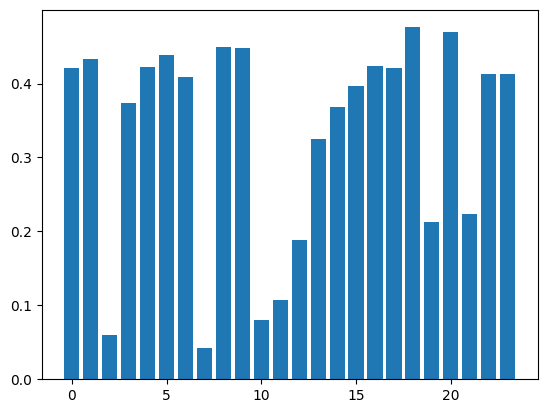

In [36]:
plt.bar(list(range(len(fs.scores_))), fs.scores_)
plt.show()